In [89]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Loading cleaned train and test datasets for fare prediction
train_df = pd.read_csv("titanic dataset for fare/cleaned_train.csv")
test_df = pd.read_csv("titanic dataset for fare/cleaned_test.csv")

In [90]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,False,False
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,False,True
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,False,True


In [91]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,True,False
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,False,True
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,True,False
3,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,False,True
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,False,True


In [92]:
# Selecting common features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
target = 'Fare'

In [93]:
# Separating input and output
X_train = train_df[features].copy()
y_train = train_df[target].values.reshape(-1, 1)

X_test = test_df[features].copy()
y_test = test_df[target].values.reshape(-1, 1)

In [94]:
# Feature scaling (fit on train, transform both)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adding bias term manually (intercept)
X_train_scaled = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
X_test_scaled = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

In [95]:

# Settings for GD algo
learning_rates = [0.01, 0.05, 0.1, 0.15]
epochs = 1000
m, n = X_train_scaled.shape

results = {}

# Loop through each learning rate
for lr in learning_rates:
    theta = np.zeros((n, 1))
    mse_list = []

    for epoch in range(epochs):
        predictions = X_train_scaled @ theta
        errors = predictions - y_train
        mse = (1 / (2 * m)) * np.sum(errors ** 2)
        mse_list.append(mse)

        gradient = (1 / m) * (X_train_scaled.T @ errors)
        theta -= lr * gradient

    # Evaluate on test set
    y_pred_test = X_test_scaled @ theta
    mse_final = mean_squared_error(y_test, y_pred_test)
    rmse_final = np.sqrt(mse_final)
    r2_final = r2_score(y_test, y_pred_test)

    results[lr] = {
        "theta": theta,
        "mse_list": mse_list,
        "mse": mse_final,
        "rmse": rmse_final,
        "r2": r2_final
    }

    print(f"\n Learning Rate: {lr}")
    print("Final MSE:", round(mse_final, 4))
    print("Final RMSE:", round(rmse_final, 4))
    print("R² Score:", round(r2_final, 4))



 Learning Rate: 0.01
Final MSE: 1890.9389
Final RMSE: 43.4849
R² Score: 0.3924

 Learning Rate: 0.05
Final MSE: 1891.2486
Final RMSE: 43.4885
R² Score: 0.3923

 Learning Rate: 0.1
Final MSE: 1891.2486
Final RMSE: 43.4885
R² Score: 0.3923

 Learning Rate: 0.15
Final MSE: 1891.2486
Final RMSE: 43.4885
R² Score: 0.3923


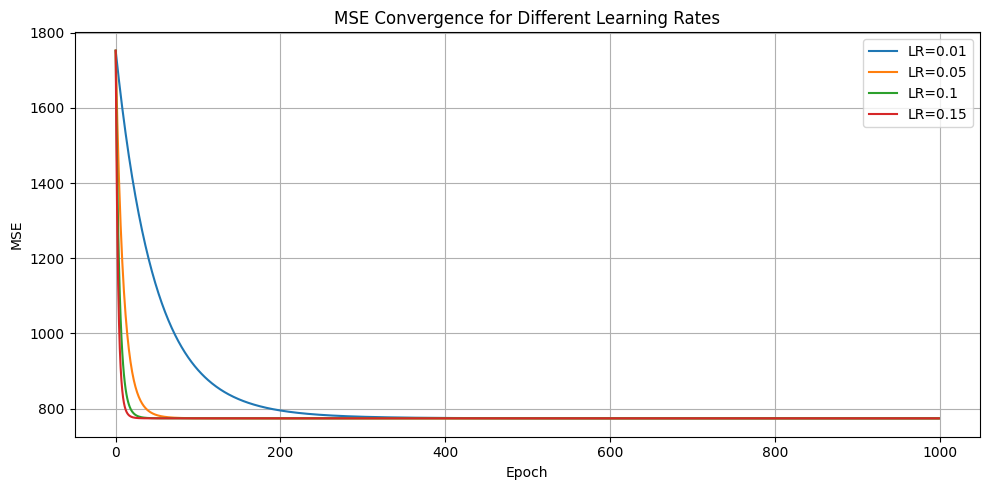

In [96]:
# Plots for MSE curves
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for lr in learning_rates:
    plt.plot(range(epochs), results[lr]["mse_list"], label=f"LR={lr}")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("MSE Convergence for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [97]:
# Identify best model
best_lr = max(results, key=lambda lr: results[lr]["r2"])
print(f"\nBest Learning Rate: {best_lr}")
print("Best R² Score:", round(results[best_lr]["r2"], 4))



Best Learning Rate: 0.01
Best R² Score: 0.3924


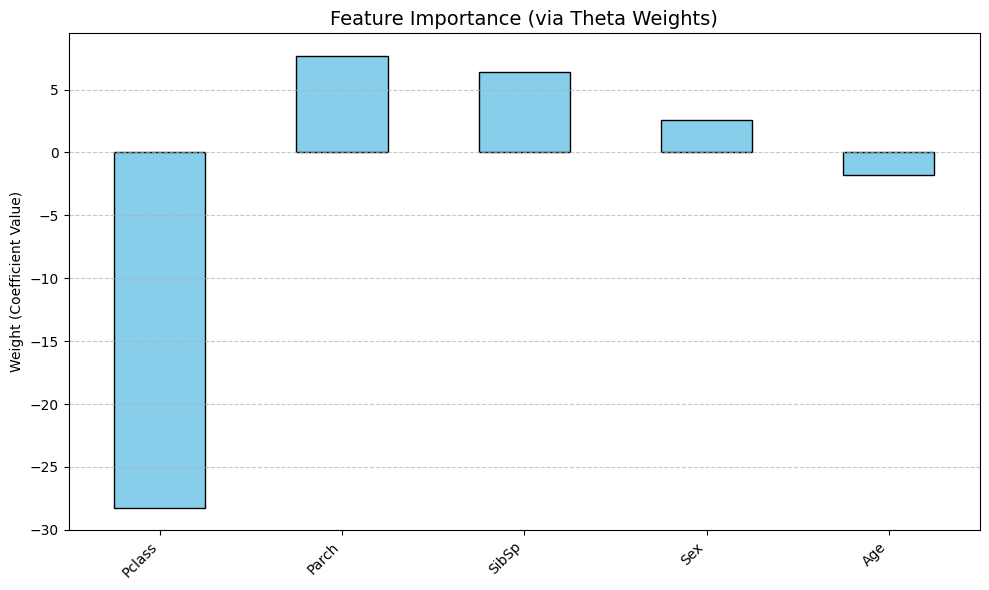

In [98]:

# Droping the bias term (intercept)
weights = theta[1:].flatten()  # shape: (n_features,)

# Using correct feature names
feature_names = X_train.columns.tolist()

# Creating a Series for easy handling
feature_weights = pd.Series(weights, index=feature_names)

# Sorting by absolute value for importance
sorted_weights = feature_weights.reindex(feature_weights.abs().sort_values(ascending=False).index)

# Plot
plt.figure(figsize=(10, 6))
sorted_weights.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Feature Importance (via Theta Weights)", fontsize=14)
plt.ylabel("Weight (Coefficient Value)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [99]:
# Feature Engineering
for df in [train_df, test_df]:
    df['FamilySize'] = df['SibSp'] + df['Parch']
    df['Sex_Pclass'] = df['Sex'] * df['Pclass']

In [100]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,Sex_Pclass
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,False,True,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,False,False,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,False,True,0,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,False,True,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,False,True,0,0


In [101]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,Sex_Pclass
0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,True,False,0,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,False,True,1,3
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,True,False,0,0
3,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,False,True,0,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,False,True,2,3


In [102]:

# Feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'FamilySize', 'Sex_Pclass']
target = 'Fare'

X_train = train_df[features].copy()
y_train = train_df[target].values.reshape(-1, 1)

X_test = test_df[features].copy()
y_test = test_df[target].values.reshape(-1, 1)

In [103]:
# Log transform of target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adding bias term
X_train_scaled = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
X_test_scaled = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

In [104]:
# Gradient Descent settings
learning_rates = [0.01, 0.05, 0.1,0.15]
epochs = 1000
m, n = X_train_scaled.shape

log_results = {}

# Training using log-transformed target
for lr in learning_rates:
    theta = np.zeros((n, 1))
    mse_list = []

    for epoch in range(epochs):
        predictions = X_train_scaled @ theta
        errors = predictions - y_train_log
        mse = (1 / (2 * m)) * np.sum(errors ** 2)
        mse_list.append(mse)

        gradient = (1 / m) * (X_train_scaled.T @ errors)
        theta -= lr * gradient

    # Predicting in log space -> convert back to original scale
    y_pred_log = X_test_scaled @ theta
    y_pred_actual = np.expm1(y_pred_log)

    mse_final = mean_squared_error(y_test, y_pred_actual)
    rmse_final = np.sqrt(mse_final)
    r2_final = r2_score(y_test, y_pred_actual)

    log_results[lr] = {
        "theta": theta,
        "mse_list": mse_list,
        "mse": mse_final,
        "rmse": rmse_final,
        "r2": r2_final
    }

    print(f"\nLearning Rate (log target with feature engineering): {lr}")
    print("Final MSE:", round(mse_final, 4))
    print("Final RMSE:", round(rmse_final, 4))
    print("R² Score:", round(r2_final, 4))




Learning Rate (log target with feature engineering): 0.01
Final MSE: 1862.4425
Final RMSE: 43.156
R² Score: 0.4015

Learning Rate (log target with feature engineering): 0.05
Final MSE: 1832.7665
Final RMSE: 42.8108
R² Score: 0.4111

Learning Rate (log target with feature engineering): 0.1
Final MSE: 1830.5557
Final RMSE: 42.785
R² Score: 0.4118

Learning Rate (log target with feature engineering): 0.15
Final MSE: 1830.4499
Final RMSE: 42.7838
R² Score: 0.4118


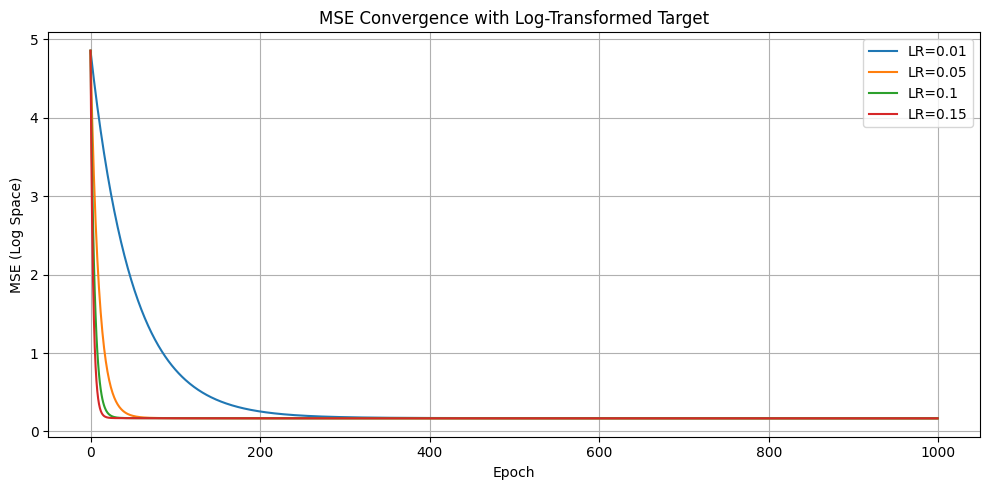


Best Learning Rate (log target): 0.15
Best R² Score: 0.4118


In [105]:
# Ploting MSE convergence

plt.figure(figsize=(10, 5))
for lr in learning_rates:
    plt.plot(range(epochs), log_results[lr]["mse_list"], label=f"LR={lr}")
plt.xlabel("Epoch")
plt.ylabel("MSE (Log Space)")
plt.title("MSE Convergence with Log-Transformed Target")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Best Learning Rate
best_lr_log = max(log_results, key=lambda lr: log_results[lr]["r2"])
best_theta = log_results[best_lr_log]["theta"]

print(f"\nBest Learning Rate (log target): {best_lr_log}")
print("Best R² Score:", round(log_results[best_lr_log]["r2"], 4))


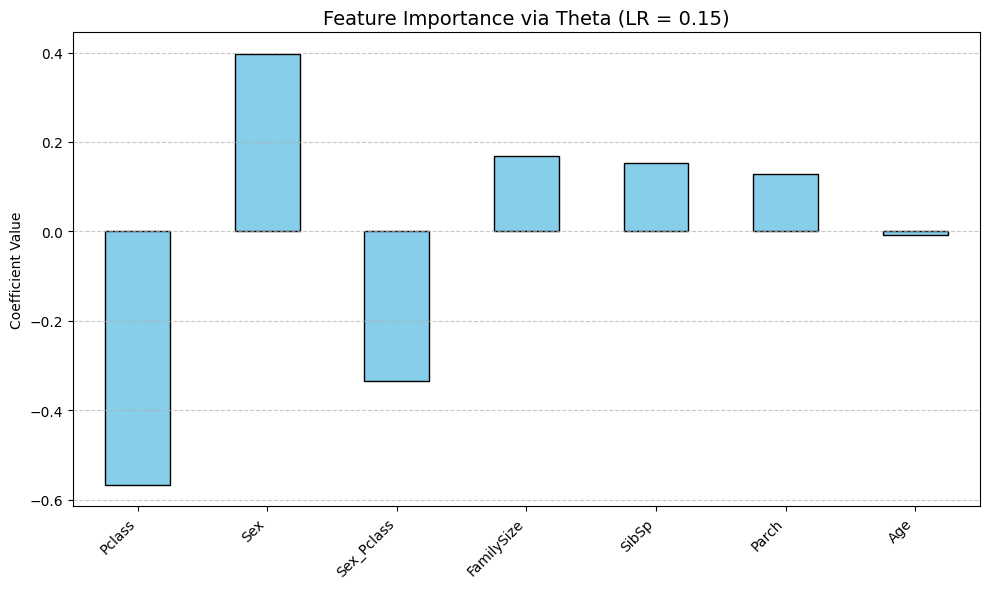

In [106]:

# --- Feature Importance ---
weights = best_theta[1:].flatten()
feature_names = X_train.columns.tolist()
feature_weights = pd.Series(weights, index=feature_names)
sorted_weights = feature_weights.reindex(feature_weights.abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
sorted_weights.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f"Feature Importance via Theta (LR = {best_lr_log})", fontsize=14)
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

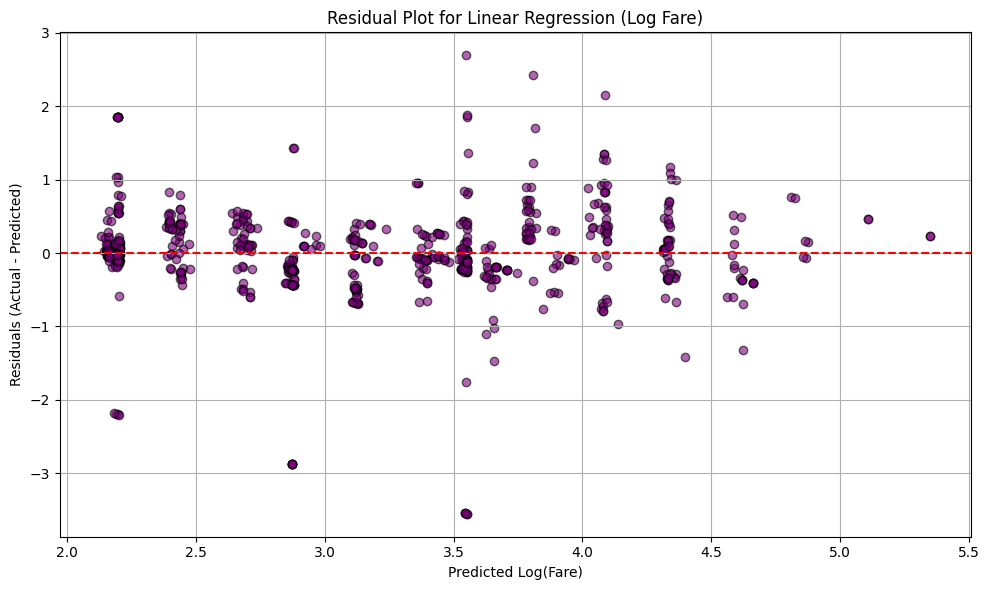

In [107]:
# --- Residual Plot ---
predictions = X_train_scaled @ best_theta
residuals = y_train_log - predictions

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, color='purple', alpha=0.6, edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Log(Fare)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Linear Regression (Log Fare)")
plt.grid(True)
plt.tight_layout()
plt.show()